In [1]:
%matplotlib inline

from tile_units import TileUnit
from tile_units import TileShape

# All the tiles!
## Basic tile units

<AxesSubplot:>

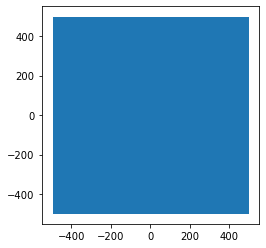

In [2]:
TileUnit().elements.plot(column = "element_id", edgecolor = "w")

<AxesSubplot:>

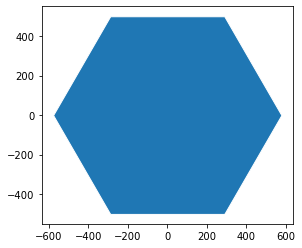

In [3]:
TileUnit(tile_shape = TileShape.HEXAGON).elements.plot(
    column = "element_id", edgecolor = "w")

How we handle triangles need some sort of resolution.

This one should be decomposed into two elements...

<AxesSubplot:>

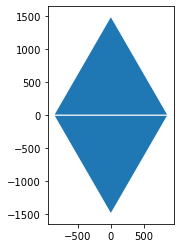

In [4]:
TileUnit(tile_shape = TileShape.TRIANGLE).elements.plot(
    column = "element_id", edgecolor = "w")

... or six.

<AxesSubplot:>

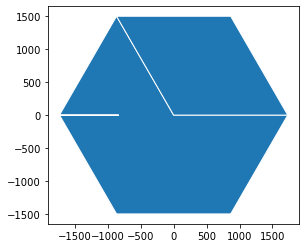

In [5]:
TileUnit(tile_shape = TileShape.TRIANGLE,
         to_hex = True).elements.plot(column = "element_id", edgecolor = "w")

## Cairo
Note that this is not the smallest tileable unit of the Cairo tiling, but it tiles on a square grid this way. 

<AxesSubplot:>

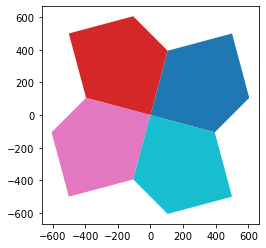

In [29]:
TileUnit(tiling_type = "cairo").elements.plot(column = "element_id")

## Hexagon dissections

<AxesSubplot:>

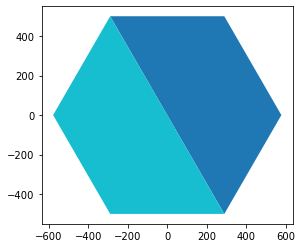

In [7]:
TileUnit(tiling_type = "hex-dissection", n = 2,
         dissection_offset = 0).elements.plot(column = "element_id")

<AxesSubplot:>

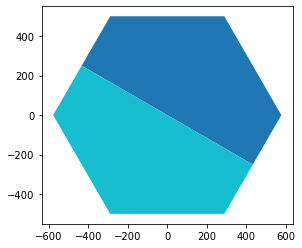

In [8]:
TileUnit(tiling_type = "hex-dissection", n = 2,
         dissection_offset = 1).elements.plot(column = "element_id")

<AxesSubplot:>

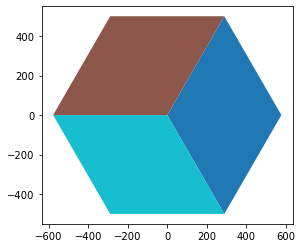

In [9]:
TileUnit(tiling_type = "hex-dissection", n = 3,
         dissection_offset = 0).elements.plot(column = "element_id")

<AxesSubplot:>

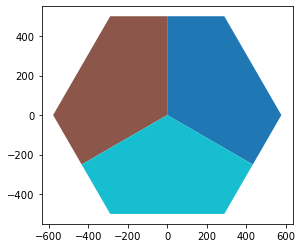

In [10]:
TileUnit(tiling_type = "hex-dissection", n = 3,
         dissection_offset = 1).elements.plot(column = "element_id")

<AxesSubplot:>

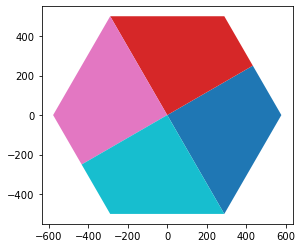

In [11]:
TileUnit(tiling_type = "hex-dissection", n = 4,
         dissection_offset = 0).elements.plot(column = "element_id")

<AxesSubplot:>

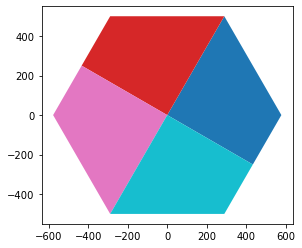

In [12]:
TileUnit(tiling_type = "hex-dissection", n = 4,
         dissection_offset = 1).elements.plot(column = "element_id")

<AxesSubplot:>

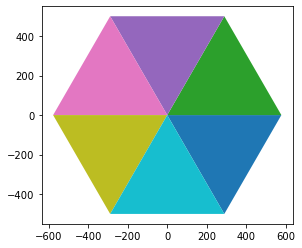

In [13]:
TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 0).elements.plot(column = "element_id")

<AxesSubplot:>

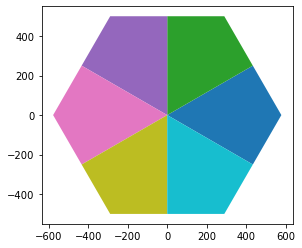

In [14]:
TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 1).elements.plot(column = "element_id")

<AxesSubplot:>

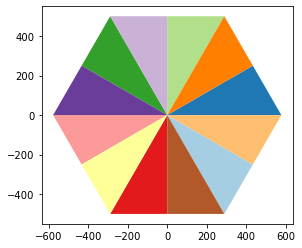

In [15]:
TileUnit(tiling_type = "hex-dissection", 
         n = 12).elements.plot(column = "element_id", cmap = "Paired")

## Laves tile units
Some of these are determined using the hex dissection.

<AxesSubplot:>

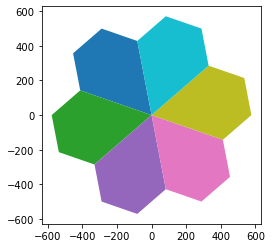

In [16]:
TileUnit(tiling_type = "laves", 
         laves_code = "3.3.3.3.6").elements.plot(column = "element_id")

The next one is not strictly \[3.3.3.4.4\] although it is topologically identical (and not very interesting!)

<AxesSubplot:>

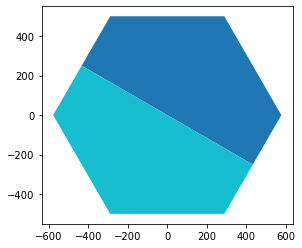

In [17]:
TileUnit(tiling_type = "laves", 
         laves_code = "3.3.3.4.4").elements.plot(column = "element_id")

<AxesSubplot:>

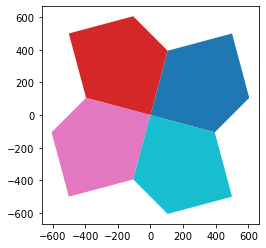

In [18]:
TileUnit(tiling_type = "laves", 
         laves_code = "3.3.4.3.4").elements.plot(column = "element_id")

<AxesSubplot:>

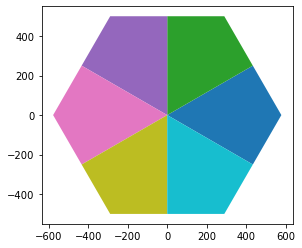

In [19]:
TileUnit(tiling_type = "laves", 
         laves_code = "3.4.6.4").elements.plot(column = "element_id")

<AxesSubplot:>

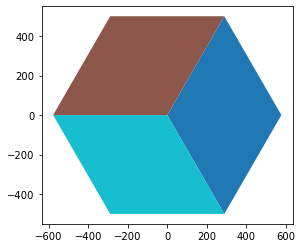

In [20]:
TileUnit(tiling_type = "laves", 
         laves_code = "3.6.3.6").elements.plot(column = "element_id")

<AxesSubplot:>

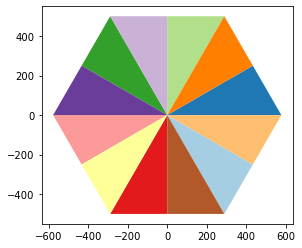

In [21]:
TileUnit(tiling_type = "laves", laves_code = "4.6.12").elements.plot(
    column = "element_id", cmap = "Paired")

## Duals
But note that these are GeoDataFrames only - the code does not infer the appropriate tile shape. In most cases it is the same as that of the input. Also note that some of these are alternative ways to get to the same tile unit!

To make this clearer the original tile unit's `tile` attribute is shown in each plot.

It's not clear how reliable the dual tiling code is at the moment. It's surprisingly effective often enough, but is happier if the only non-regular polygons in the tiling are triangles. Non-regular polyons throw it off.

<AxesSubplot:>

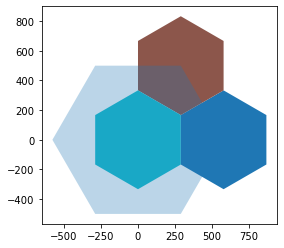

In [22]:
import tiling_utils

ax = tiling_utils.get_dual_tile_unit(
    TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 0)).plot(column = "element_id")
TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 0).tile.plot(ax = ax, alpha = 0.3)

<AxesSubplot:>

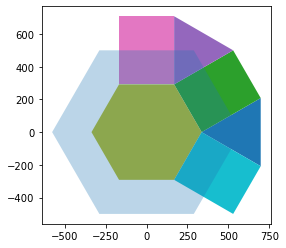

In [23]:
ax = tiling_utils.get_dual_tile_unit(
    TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 1)).plot(column = "element_id")
TileUnit(tiling_type = "hex-dissection", n = 6,
         dissection_offset = 1).tile.plot(ax = ax, alpha = 0.3)

This is almost correct - it will tile if one of the duplicate squares is removed...

<AxesSubplot:>

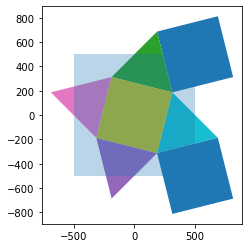

In [24]:
ax = tiling_utils.get_dual_tile_unit(
    TileUnit(tiling_type = "laves", 
             laves_code = "3.3.4.3.4")).plot(column = "element_id")
TileUnit(tiling_type = "laves", 
             laves_code = "3.3.4.3.4").tile.plot(ax = ax, alpha = 0.3)

This one is not tileable as is. If it were to lose one hexagom - either of the duplicate ones would do - non-obvious, but true!

<AxesSubplot:>

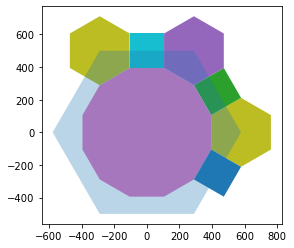

In [26]:
ax = tiling_utils.get_dual_tile_unit(
    TileUnit(tiling_type = "laves", 
             laves_code = "4.6.12")).plot(column = "element_id")
TileUnit(tiling_type = "laves", 
             laves_code = "4.6.12").tile.plot(ax = ax, alpha = 0.3)

The above two examples suggest the possibility of removing any duplicate labelled polygons from the dual unit as an automatic fix in some cases.

Surprisingly, the one below works! It really takes imagination to see it, but that hex shape is a viable tileable unit for this arrangement of elements!

<AxesSubplot:>

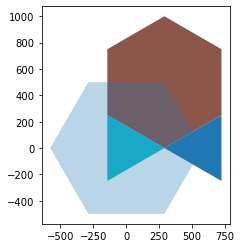

In [25]:
import tiling_utils

ax = tiling_utils.get_dual_tile_unit(
    TileUnit(tiling_type = "hex-dissection", n = 3,
         dissection_offset = 0)).plot(column = "element_id")
TileUnit(tiling_type = "hex-dissection", n = 3,
         dissection_offset = 0).tile.plot(ax = ax, alpha = 0.3)